# Временные ряды PyCaret

In [1]:
%%capture
!pip install pycaret-ts-alpha

In [6]:
import pandas as pd
from pycaret.datasets import get_data
from pycaret.internal.pycaret_experiment import TimeSeriesExperiment

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [3]:
data = get_data('pycaret_downloads')
data['Date'] = pd.to_datetime(data['Date'])
data = data.groupby('Date').sum()
data = data.asfreq('D')

,Date,Total
0,7/8/2021,3773
1,7/9/2021,3172
2,7/10/2021,2079
3,7/11/2021,2725
4,7/12/2021,4542


In [4]:
data.head()

,Total
Date,
2021-07-08,3773
2021-07-09,3172
2021-07-10,2079
2021-07-11,2725
2021-07-12,4542


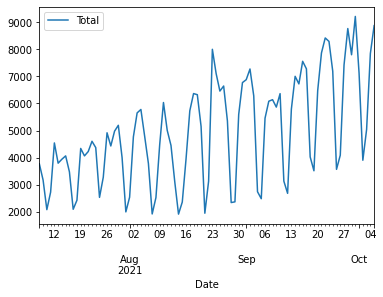

In [5]:
data.plot()

### Установка

In [7]:
exp = TimeSeriesExperiment()
exp.setup(data, fh = 7, fold = 3, session_id = 123)

,Description,Value
0,session_id,123
1,Original Data,"(90, 1)"
2,Missing Values,False
3,Transformed Train Set,"(83,)"
4,Transformed Test Set,"(7,)"
5,Fold Generator,ExpandingWindowSplitter
6,Fold Number,3
7,Enforce Prediction Interval,False
8,Seasonal Period Tested,7
9,Seasonality Detected,True


### Статистическое тестирование

In [9]:
exp.check_stats()

,Test,Test Name,Property,Setting,Value
0,Summary,Statistics,Length,,90.0
1,Summary,Statistics,Mean,,4960.366667
2,Summary,Statistics,Median,,4776.5
3,Summary,Statistics,Standard Deviation,,1939.000116
4,Summary,Statistics,Variance,,3759721.448315
5,Summary,Statistics,Kurtosis,,-0.920113
6,Summary,Statistics,Skewness,,0.22622
7,Summary,Statistics,# Distinct Values,,89.0
8,White Noise,Ljung-Box,Test Statictic,"{'alpha': 0.05, 'K': 24}",293.08932
9,White Noise,Ljung-Box,Test Statictic,"{'alpha': 0.05, 'K': 48}",460.125833


### Разведочный анализ данных

In [10]:
exp.plot_model(plot = 'ts')

In [12]:
exp.plot_model(plot = 'cv')

In [13]:
exp.plot_model(plot = 'acf')

In [14]:
exp.plot_model(plot = 'diagnostics')

In [15]:
exp.plot_model(plot = 'decomp_stl')

### Обучение и выбор модели

In [16]:
best = exp.compare_models()

,Model,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2,TT (Sec)
auto_arima,Auto ARIMA,531.9171,626.2104,0.0911,0.0916,0.849,0.6902,0.8632,2.8733
theta,Theta Forecaster,514.4002,649.1971,0.0903,0.0964,0.8259,0.7162,0.8339,0.0300
arima,ARIMA,568.4974,687.2509,0.0957,0.0975,0.9085,0.758,0.8316,0.0500
lightgbm_cds_dt,Light Gradient Boosting w/ Cond. Deseasonalize...,571.1749,672.9608,0.1022,0.099,0.9132,0.7415,0.8368,0.0400
et_cds_dt,Extra Trees w/ Cond. Deseasonalize & Detrending,583.112,715.5584,0.1014,0.0996,0.9318,0.789,0.8204,0.6067
gbr_cds_dt,Gradient Boosting w/ Cond. Deseasonalize & Det...,606.4919,709.8125,0.1052,0.1043,0.9706,0.7826,0.8179,0.0600
rf_cds_dt,Random Forest w/ Cond. Deseasonalize & Detrending,616.3891,731.3832,0.1062,0.1049,0.9845,0.8067,0.8118,0.6767
exp_smooth,Exponential Smoothing,542.7593,635.8877,0.0994,0.1062,0.8697,0.7016,0.8487,0.1167
lr_cds_dt,Linear w/ Cond. Deseasonalize & Detrending,632.7132,746.7205,0.1081,0.1075,1.0093,0.8238,0.8079,0.0267
lar_cds_dt,Least Angular Regressor w/ Cond. Deseasonalize...,632.7132,746.7205,0.1081,0.1075,1.0093,0.8238,0.8079,0.0267


In [18]:
prophet = exp.create_model('prophet')
print(prophet)

,cutoff,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2
0,2021-09-07,579.0242,655.8335,0.1347,0.1232,0.9371,0.7150,0.8212
1,2021-09-14,641.3026,816.9084,0.1024,0.1088,1.0449,0.9101,0.7413
2,2021-09-21,870.3595,987.0935,0.1183,0.1250,1.3490,1.0889,0.7477
Mean,NaT,696.8954,819.9451,0.1185,0.1190,1.1104,0.9047,0.7701
SD,NaT,125.2650,135.2534,0.0132,0.0073,0.1744,0.1527,0.0363


ProphetPeriodPatched(add_country_holidays=None, add_seasonality=None,
                     alpha=0.05, changepoint_prior_scale=0.05,
                     changepoint_range=0.8, changepoints=None,
                     daily_seasonality='auto', freq=None, growth='linear',
                     holidays=None, holidays_prior_scale=10.0, mcmc_samples=0,
                     n_changepoints=25, seasonality_mode='additive',
                     seasonality_prior_scale=10.0, stan_backend=None,
                     uncertainty_samples=1000, verbose=0,
                     weekly_seasonality='auto', yearly_seasonality='auto')


In [19]:
tuned_prophet = exp.tune_model(prophet)
print(tuned_prophet)

,cutoff,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2
0,2021-09-07,649.0172,711.2958,0.1351,0.1270,1.0504,0.7755,0.7897
1,2021-09-14,585.7204,718.3293,0.0986,0.1071,0.9544,0.8003,0.7999
2,2021-09-21,654.0680,707.8493,0.0942,0.0991,1.0138,0.7809,0.8703
Mean,NaT,629.6019,712.4915,0.1093,0.1111,1.0062,0.7855,0.8200
SD,NaT,31.0973,4.3612,0.0183,0.0117,0.0396,0.0107,0.0358


ProphetPeriodPatched(add_country_holidays=None, add_seasonality=None,
                     alpha=0.05, changepoint_prior_scale=0.07052367291265604,
                     changepoint_range=0.8, changepoints=None,
                     daily_seasonality='auto', freq=None, growth='linear',
                     holidays=None, holidays_prior_scale=0.2772015819815348,
                     mcmc_samples=0, n_changepoints=25,
                     seasonality_mode='multiplicative',
                     seasonality_prior_scale=0.15960727025988383,
                     stan_backend=None, uncertainty_samples=1000, verbose=0,
                     weekly_seasonality='auto', yearly_seasonality='auto')


In [20]:
exp.plot_model(best, plot = 'forecast')

In [21]:
exp.plot_model(best, plot = 'forecast', data_kwargs = {'fh' : 30})

In [22]:
exp.plot_model(best, plot = 'insample')

In [23]:
exp.plot_model(best, plot = 'residuals')

In [24]:
exp.plot_model(best, plot = 'diagnostics')

### Развертывание

In [25]:
final_best = exp.finalize_model(best)
exp.predict_model(final_best, fh = 90)

2021-10-06     8392.9180
2021-10-07     9061.0279
2021-10-08     7701.1441
2021-10-09     4390.7528
2021-10-10     4972.7552
                 ...    
2021-12-30    13175.0791
2021-12-31    11815.1953
2022-01-01     8504.8040
2022-01-02     9086.8065
2022-01-03    12086.9226
Freq: D, Name: Total, Length: 90, dtype: float64

In [26]:
exp.save_model(final_best, 'my_best_model')

Transformation Pipeline and Model Successfully Saved


(AutoARIMA(D=None, alpha=0.05, d=None, error_action='warn',
           information_criterion='aic', max_D=1, max_P=2, max_Q=2, max_d=2,
           max_order=5, max_p=5, max_q=5, maxiter=50, method='lbfgs', n_fits=10,
           n_jobs=1, offset_test_args=None, out_of_sample_size=0, random=False,
           random_state=123, scoring='mse', scoring_args=None, seasonal=True,
           seasonal_test='ocsb', seasonal_test_args=None, sp=7, start_P=1,
           start_Q=1, start_p=2, start_params=None, ...), 'my_best_model.pkl')